<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        4521 non-null   int64  
 1   job        4521 non-null   object 
 2   marital    4521 non-null   object 
 3   education  4521 non-null   object 
 4   default    4521 non-null   object 
 5   balance    4495 non-null   float64
 6   housing    4521 non-null   object 
 7   loan       4521 non-null   object 
 8   contact    4521 non-null   object 
 9   day        4521 non-null   int64  
 10  month      4521 non-null   object 
 11  duration   4521 non-null   int64  
 12  campaign   4442 non-null   float64
 13  pdays      4521 non-null   int64  
 14  previous   4521 non-null   int64  
 15  poutcome   4521 non-null   object 
 16  y          4521 non-null   object 
dtypes: float64(2), int64(5), object(10)
memory usage: 600.6+ KB



,Missing Count
balance,26
campaign,79


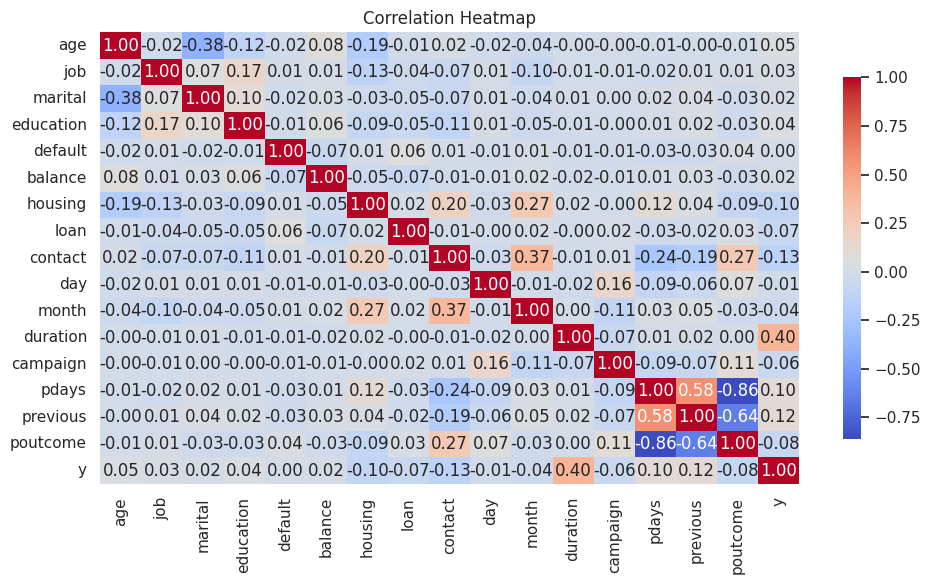

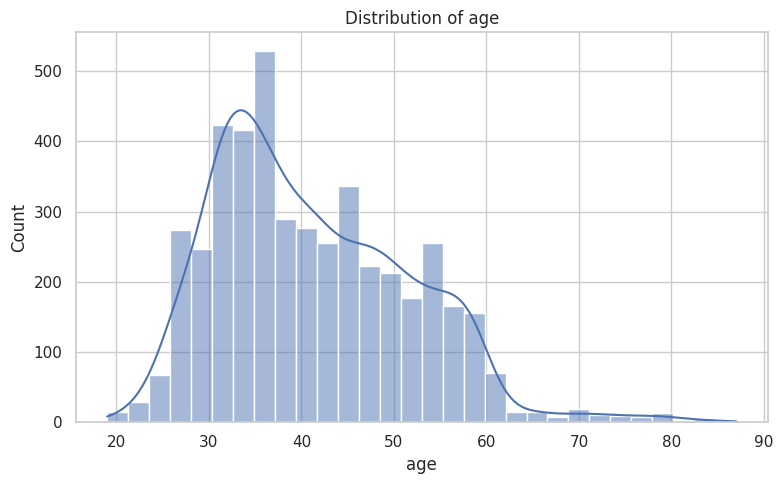

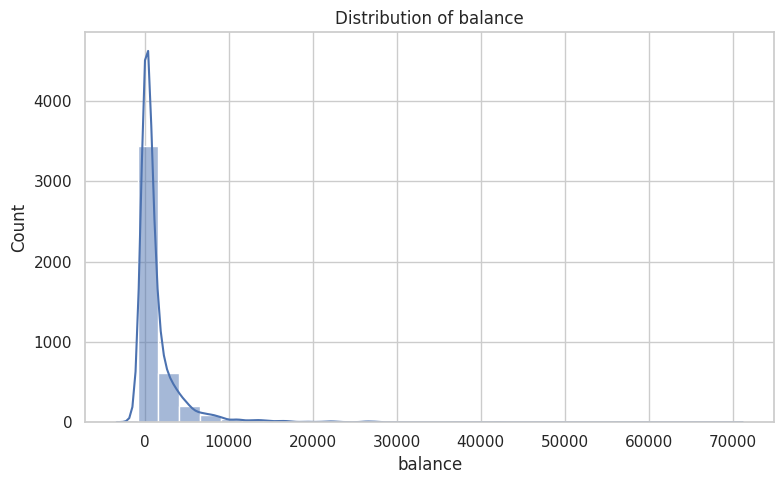

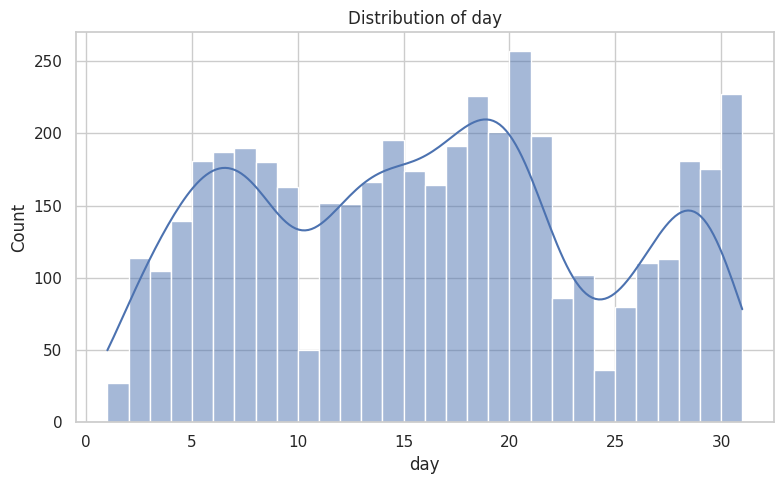

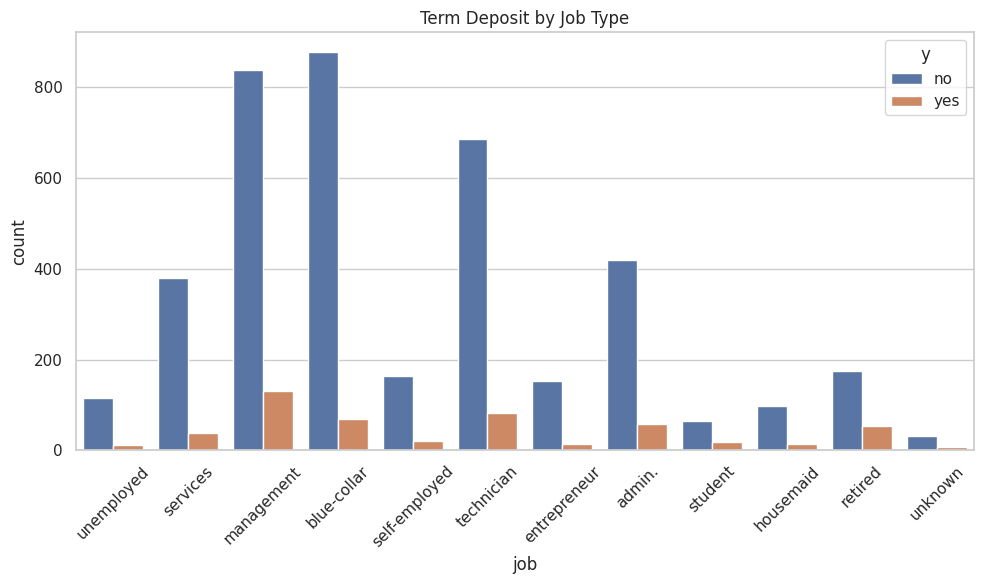

,precision,recall,f1-score,support
0,0.92,0.97,0.95,807.00
1,0.59,0.31,0.40,98.00
accuracy,0.90,0.90,0.90,0.90
macro avg,0.75,0.64,0.67,905.00
weighted avg,0.88,0.90,0.89,905.00


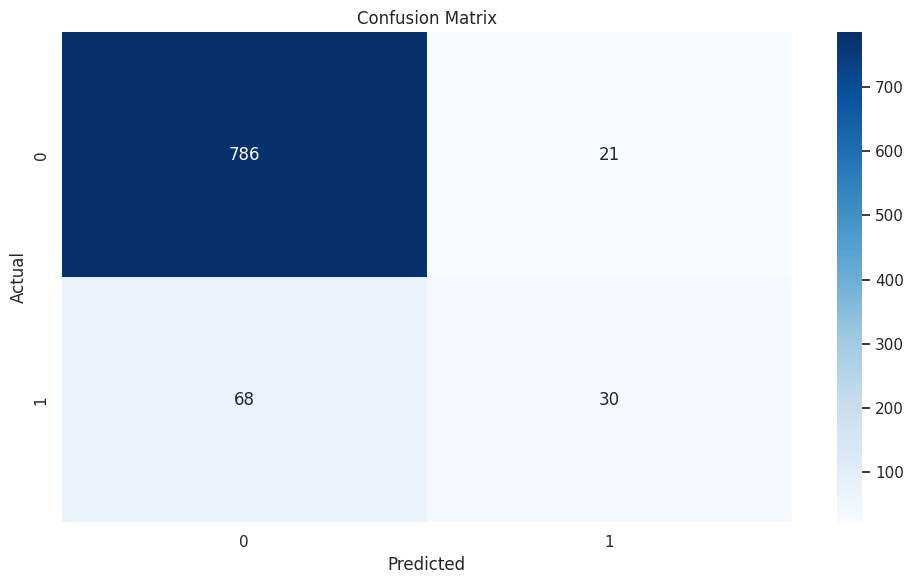

,Importance
duration,0.290026
balance,0.105294
age,0.104606
day,0.089666
month,0.081583


,What To Do:
0,Focus campaigns on customer groups with top in...
1,Segment by age and occupation for better targe...
2,Improve contact strategies based on duration a...
3,Use model predictions to prioritize lead scoring.
4,Evaluate underperforming segments and retrain ...


In [1]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from IPython.display import display, HTML
import io
import warnings

warnings.filterwarnings("ignore")
sns.set(style="whitegrid")

# Step 2: Load CSV from GitHub
url = "https://raw.githubusercontent.com/danish330/Client-Strategy-Engine-for-Banking-Analytics/refs/heads/main/bank.csv"
df = pd.read_csv(url)
df.columns = df.columns.str.strip().str.lower().str.replace('.', '_').str.replace(' ', '_')

# Step 3: Informations
buffer = io.StringIO()
df.info(buf=buffer)
info_str = buffer.getvalue()
print(info_str)

# Step 4: Missing Values
missing = df.isnull().sum()
display(HTML("<h4>Missing Values</h4>"))
display(missing[missing > 0].to_frame(name="Missing Count").style.background_gradient("Reds"))

# Step 5: Categories
categorical_cols = df.select_dtypes(include=['object']).columns
df_encoded = df.copy()
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df[col].astype(str))
    label_encoders[col] = le

# Step 6: Correlation Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df_encoded.corr(), annot=True, cmap="coolwarm", fmt=".2f", cbar_kws={"shrink": .8})
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()

# Step 7: Distribution Plots
numeric_cols = df.select_dtypes(include=np.number).columns
for col in numeric_cols[:3]:  # Limit to first 3 numerical columns
    plt.figure(figsize=(8, 5))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.tight_layout()
    plt.show()

# Step 8: Job vs Term Deposit if exists
if 'job' in df.columns and 'y' in df.columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x='job', hue='y')
    plt.title("Term Deposit by Job Type")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Step 9: Random Forest Classification if 'y' exists
if 'y' in df.columns:
    X = df_encoded.drop('y', axis=1)
    y = df_encoded['y']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model = RandomForestClassifier(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Classification Report
    report = classification_report(y_test, y_pred, output_dict=True)
    report_df = pd.DataFrame(report).transpose()
    display(HTML("<h4>Classification Report</h4>"))
    display(report_df.style.background_gradient("Blues").format("{:.2f}"))

    # Confusion Matrix
    plt.figure(figsize=(10, 6))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion Matrix")
    plt.tight_layout()
    plt.show()

    # Feature Importance
    feature_imp = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
    display(HTML("<h4>Top 5 Most Influential Features</h4>"))
    display(feature_imp.head(5).to_frame(name="Importance").style.bar(color='lightgreen'))

    # Recommendations
    recommendations = [
        "Focus campaigns on customer groups with top influential features.",
        "Segment by age and occupation for better targeting.",
        "Improve contact strategies based on duration and previous outcomes.",
        "Use model predictions to prioritize lead scoring.",
        "Evaluate underperforming segments and retrain frequently."
    ]
    display(HTML("<h4>Recommendations</h4>"))
    display(pd.DataFrame(recommendations, columns=["What To Do: "]))
else:
    print("Column 'y' not found. Skipping model training.")
